# Problem Statement

Problem 1:  Prediction task is to determine whether a person makes over 50K a year. <br\>
Problem 2: Which factors are important <br\>
Problem 3: Which algorithm are best for this dataset <br\>

#### The description of the dataset is as follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: 
####((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
* >50K, <=50K.
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.

* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-
specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,

Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.

In [1]:
#code to load required libraries and data:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
%matplotlib inline
# Machine learning
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
# Grid and Random Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

#### Note: 

The data pertaining to native country  has few unknow values represented by ?
Same is the case with workclass and occupation feature

# Load training and test data into corresponding dataframes

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,na_values="?")

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None,na_values="?")

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

# View training and test data sample

In [4]:
train_set.sample(4, random_state = 42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [5]:
test_set.sample(4, random_state = 42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
13633,29,Private,189346,HS-grad,9,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States,<=50K.
1921,31,Private,137076,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K.
12140,52,Federal-gov,35546,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K.
9933,54,Local-gov,116428,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.


# Check for null values if any  in training and test data sets

In [6]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [8]:
pd.DataFrame([train_set.dtypes, test_set.dtypes], index = ['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


# Find the columns having data types as object

In [9]:
# Check for null values in training set
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
# Check for null values in test set
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
#get summary of the data
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#get datatypes of train and test data
train_data_types=pd.DataFrame(train_set.dtypes,columns=['datatype'])
test_data_types=pd.DataFrame(train_set.dtypes,columns=['datatype'])

In [13]:
#get columns having datatype=object in training and test dataset
train_data_obj=train_data_types[train_data_types['datatype']=='object'].reset_index()
test_data_obj=test_data_types[test_data_types['datatype']=='object'].reset_index()

In [14]:
#examine unique values of categorical variable in training set

for i in train_data_obj['index']:
    print('-'*50)
    print("unique values for : ",i)
    print(train_set[i].value_counts())

--------------------------------------------------
unique values for :  workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------
unique values for :  education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
--------------------------------------------------
unique values for :  marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced     

In [15]:
#examine unique values of categorical variable in test set

for i in test_data_obj['index']:
    print('-'*50)
    print("unique values for : ",i)
    print(test_set[i].value_counts())

--------------------------------------------------
unique values for :  workclass
 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64
--------------------------------------------------
unique values for :  education
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: int64
--------------------------------------------------
unique values for :  marital_status
 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 

In [16]:
# Now Convert the categorical variable to numerical values
from sklearn.preprocessing import LabelEncoder

In [17]:
lb_encode=LabelEncoder()

for i in train_data_obj['index']:
    train_set[i]=lb_encode.fit_transform(train_set[i])
    
for i in test_data_obj['index']:
    test_set[i]=lb_encode.fit_transform(test_set[i])

In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education         32561 non-null int64
education_num     32561 non-null int64
marital_status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null int64
wage_class        32561 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [19]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null int64
fnlwgt            16281 non-null int64
education         16281 non-null int64
education_num     16281 non-null int64
marital_status    16281 non-null int64
occupation        16281 non-null int64
relationship      16281 non-null int64
race              16281 non-null int64
sex               16281 non-null int64
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null int64
wage_class        16281 non-null int64
dtypes: int64(15)
memory usage: 1.9 MB


# Concatenate training datasets and test datasets into a common dataframe Sample

In [20]:
X_train = train_set.copy()
X_test = test_set.copy()

In [21]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [22]:
Sample = X_train.append(X_test)

# Summary Statistics of Continuous Values

In [23]:
Sample.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,1.896641e+05,10.288420,10.078089,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.431350,0.239282
std,13.710510,1.464234,1.056040e+05,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.723151,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,4.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.376420e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Eliminating irrelevant data value ? from the training and test data set

In [25]:
train_set = train_set.apply(lambda x : x.replace(' ?',np.nan))
test_set = test_set.apply(lambda x : x.replace(' ?',np.nan))

In [26]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [27]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [28]:
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

In [29]:
test_set.isnull().sum(),train_set.isnull().sum()

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64, age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64)

#### Note
Negative class is around 76% of the whole data samples.
Positive class is around 24 % of the whole data samples.
The dataset seems to be almost  a balanced dataset.

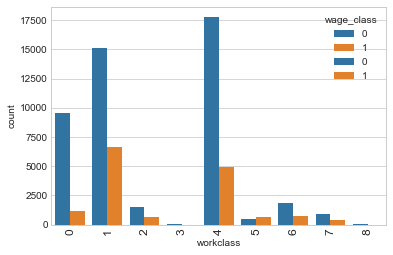

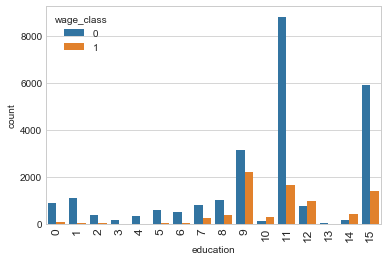

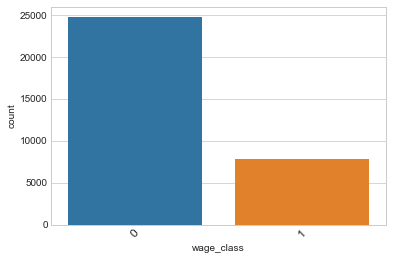

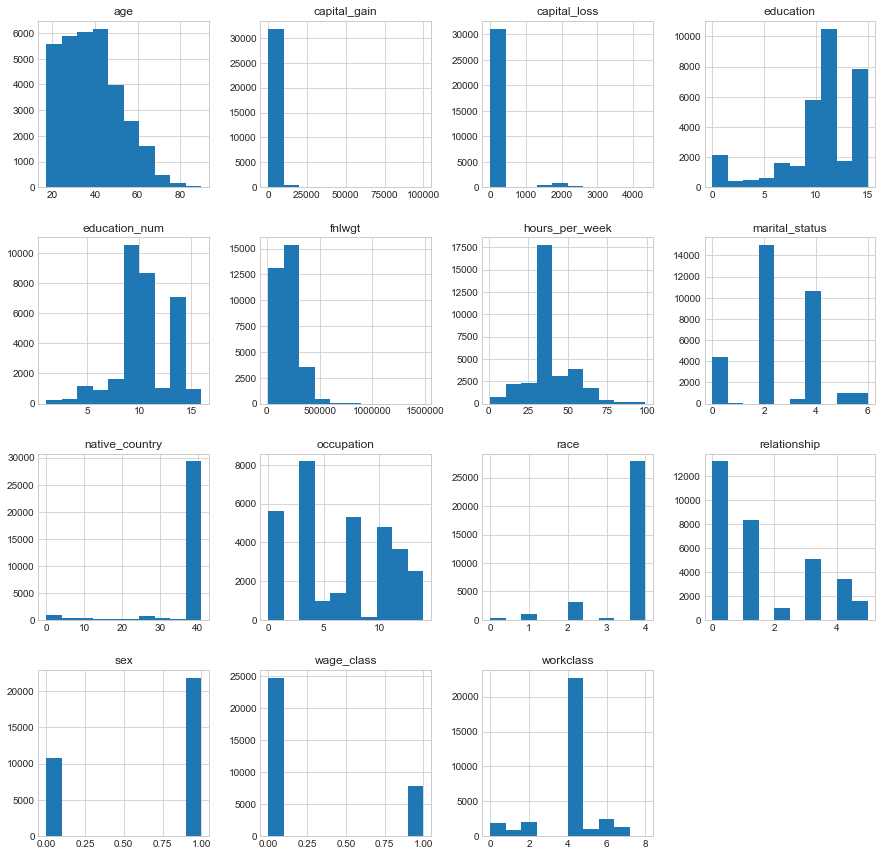

In [30]:
# Annual Income Data Analysis using Visualization

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
sns.set_style('whitegrid')
%matplotlib inline
sns.countplot('sex',data=train_set,hue='wage_class')

g = sns.countplot('workclass',data=train_set,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()


g = sns.countplot('education',data=train_set,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

g = sns.countplot('wage_class',data=train_set)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
plt.show()

pd.DataFrame.hist(train_set,figsize = [15,15])
plt.show()

In [31]:
l = X_train.append(X_test)
l.wage_class.value_counts()

Features = l.drop('wage_class',axis=1)
Labels = l['wage_class']

Features.native_country.unique()

array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15], dtype=int64)

# Separating the Training Label and Test Label from the the training and test Features variables

In [32]:
x_train = X_train.drop('wage_class',axis=1)
y_train = X_train['wage_class']

x_test = X_test.drop('wage_class',axis=1)
y_test = X_test['wage_class']

#### Training Features and Labels

In [33]:
X = x_train.values
Y = y_train.values

#### Validation Features and Labels

In [34]:
Xtest = x_test.values
Ytest = y_test.values

In [35]:
x_train.shape,y_train.shape,X.shape,Y.shape,Xtest.shape,Ytest.shape

((32561, 14), (32561,), (32561, 14), (32561,), (16281, 14), (16281,))

In [36]:
Xtest

array([[    25,      4, 226802, ...,      0,     40,     38],
       [    38,      4,  89814, ...,      0,     50,     38],
       [    28,      2, 336951, ...,      0,     40,     38],
       ...,
       [    38,      4, 374983, ...,      0,     50,     38],
       [    44,      4,  83891, ...,      0,     40,     38],
       [    35,      5, 182148, ...,      0,     60,     38]], dtype=int64)

# Applying Logistic Regression

In [37]:
model_accuracy = {}
#Build the model
LR = LogisticRegression()
#traing the model 
LR.fit(X,Y)
#Model parameters study
Ypred = LR.predict(Xtest)
Ypred_proba = LR.predict_proba(Xtest)
# generate evaluation metrics
print(metrics.accuracy_score(Ytest, Ypred))
model_accuracy['Logistic Regression'] = metrics.accuracy_score(Ytest, Ypred)

0.7950371598796143


In [38]:
test_data =[]
for i in x_test.columns:
    test_data.append(x_test[i].max())
print(test_data)
test = np.array(test_data).reshape(-1,14)
print(test.shape)
print("Predicted Label \n ")
print(LR.predict(test))
print('Prediction Probabilities \n ')
print(LR.predict_proba(test))
print('coefficients = ',LR.coef_)


[90, 8, 1490400, 15, 16, 6, 14, 5, 4, 1, 99999, 3770, 99, 40]
(1, 14)
Predicted Label 
 
[1]
Prediction Probabilities 
 
[[1.39888101e-14 1.00000000e+00]]
coefficients =  [[ 1.11309330e-02 -4.70782095e-03 -2.50620900e-06 -8.18891421e-03
   5.58843192e-03 -1.26503101e-02 -2.02443731e-03 -1.34748846e-02
  -4.28604764e-03  1.73228118e-03  3.28906863e-04  7.58241794e-04
   8.52690210e-03 -4.25939519e-02]]


#### Note
That implies that there is a 100% possibility of the person to have a income > 50k for the input features as evident from prediction probability.

# Evaluation of Logistic Regression Model

#### Confusion Matrix

In [42]:
metrics.confusion_matrix(Ytest,Ypred)

array([[11834,   601],
       [ 2736,  1110]], dtype=int64)

#### ROC and AUC

In [43]:
print("ROC : ",(metrics.roc_curve(Ytest,Ypred_proba[:,1])))
print("AUC : ",(metrics.roc_auc_score(Ytest,Ypred_proba[:,1])))

ROC :  (array([0.        , 0.        , 0.        , ..., 0.99879373, 0.99879373,
       1.        ]), array([2.60010400e-04, 2.60010400e-03, 4.16016641e-03, ...,
       9.99739990e-01, 1.00000000e+00, 1.00000000e+00]), array([1.        , 1.        , 1.        , ..., 0.04542068, 0.04382965,
       0.00777915]))
AUC :  0.701520135594326


In [44]:
model_accuracy['AUC_Logistic_Regression'] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,Ypred))

             precision    recall  f1-score   support

          0       0.81      0.95      0.88     12435
          1       0.65      0.29      0.40      3846

avg / total       0.77      0.80      0.76     16281



#### Applying 10 Fold Cross Validation to Logistic Regression Model

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= LogisticRegression(),     # Model to test
                X= Features,  
                y = Labels,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-Logistic Regression'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.78833163 0.80061412 0.80368475 0.79119754 0.78710338 0.78951679
 0.79750205 0.80483309 0.78353471 0.79234077]
Average accuracy:  0.7938658840531956


# Feature Selection for Logistic Regression Model

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [47]:
from sklearn.feature_selection import RFE, RFECV
selector =  RFE(estimator=LogisticRegression(), step=1)
selector.fit(Features,Labels)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

#### Note 
ranking_ : array of shape [n_features]

The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

In [48]:
ranks = selector.ranking_.tolist()
ranks

[1, 2, 8, 3, 1, 1, 4, 1, 1, 1, 7, 6, 1, 5]

In [49]:
df_rank = pd.DataFrame({'Feature':Features.columns,'Rank':ranks})
df_rank

,Feature,Rank
0,age,1
1,workclass,2
2,fnlwgt,8
3,education,3
4,education_num,1
5,marital_status,1
6,occupation,4
7,relationship,1
8,race,1
9,sex,1


In [50]:
#most imporatnt features

imp= df_rank.Feature[df_rank.Rank == 1]
print("The important Features in the sample data are as follows :-\n",imp.values)

The important Features in the sample data are as follows :-
 ['age' 'education_num' 'marital_status' 'relationship' 'race' 'sex'
 'hours_per_week']


#### Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

In [51]:
selector =  RFECV(estimator=LogisticRegression(), step=1,cv=10)
selector.fit(Features,Labels)
ranks = selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':Features.columns,'Rank':ranks})
df_rank_cv

,Feature,Rank
0,age,1
1,workclass,1
2,fnlwgt,2
3,education,1
4,education_num,1
5,marital_status,1
6,occupation,1
7,relationship,1
8,race,1
9,sex,1


In [52]:
impcv= df_rank_cv.Feature[df_rank_cv.Rank == 1]
print("The important Features in the sample data after REFCV are as follows :-\n",impcv.values)

The important Features in the sample data after REFCV are as follows :-
 ['age' 'workclass' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']


# Applying Decison Tree Classifier Model to the sample Data

In [54]:
#build the model
DT = DecisionTreeClassifier(random_state=0)
#train the model
DT.fit(X,Y)
#Model parameters study
Ypred = DT.predict(Xtest)
Ypred_proba = DT.predict_proba(Xtest)
# generate evaluation metrics
print("accuracy of Decision Tree Classifier :",metrics.accuracy_score(Ytest, Ypred))
#model_accuracy['Decision Tree Classifier'] = metrics.accuracy_score(Ytest, Ypred)

accuracy of Decision Tree Classifier : 0.8100853755911799


#### Decision Tree Classifier Model with max_depth in a range of 1 to 20

In [55]:
for depth in range(20):
    #build the model
    depth = depth + 1
    DT = DecisionTreeClassifier(max_depth=depth,random_state=0)
    #train the model
    DT.fit(X,Y)
    #Model parameters study
    Ypred = DT.predict(Xtest)
    Ypred_proba = DT.predict_proba(Xtest)
    # generate evaluation metrics
    print("accuracy of Decision Tree Classifier for max_depth ", depth," : ",metrics.accuracy_score(Ytest, Ypred))
    
    #model_accuracy[auc] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1])

accuracy of Decision Tree Classifier for max_depth  1  :  0.7637737239727289
accuracy of Decision Tree Classifier for max_depth  2  :  0.8267919660954487
accuracy of Decision Tree Classifier for max_depth  3  :  0.839199066396413
accuracy of Decision Tree Classifier for max_depth  4  :  0.8442356120631411
accuracy of Decision Tree Classifier for max_depth  5  :  0.8514219028315214
accuracy of Decision Tree Classifier for max_depth  6  :  0.8546772311283091
accuracy of Decision Tree Classifier for max_depth  7  :  0.8563970272096308
accuracy of Decision Tree Classifier for max_depth  8  :  0.8538787543762668
accuracy of Decision Tree Classifier for max_depth  9  :  0.8513604815429028
accuracy of Decision Tree Classifier for max_depth  10  :  0.8551071801486395
accuracy of Decision Tree Classifier for max_depth  11  :  0.8522203795835637
accuracy of Decision Tree Classifier for max_depth  12  :  0.8519132731404705
accuracy of Decision Tree Classifier for max_depth  13  :  0.8495792641729

#### Note 
The model gives a better accuracy with depth = 10

In [56]:
#since the model has best accuracy for max_depth 10 so retraining the model with max_depth as 10
#build the model
DT = DecisionTreeClassifier(max_depth=10,random_state=0)
#train the model
DT.fit(X,Y)
#Model parameters study
Ypred = DT.predict(Xtest)
Ypred_proba = DT.predict_proba(Xtest)
# generate evaluation metrics
print("accuracy of Decision Tree Classifier :",metrics.accuracy_score(Ytest, Ypred))
model_accuracy['Accuracy Score of Decision Tree Classifier Model'] = metrics.accuracy_score(Ytest, Ypred)
model_accuracy['AUC of Decision Tree Model Classifier - depth 10'] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1])

accuracy of Decision Tree Classifier : 0.8551071801486395


# Evaluation of the Decision Tree Model trained with max_depth as 10

#### Confusion Matrix

In [57]:
metrics.confusion_matrix(Ytest,Ypred)

array([[11725,   710],
       [ 1649,  2197]], dtype=int64)

#### ROC and AUC

In [58]:
print("ROC : ",(metrics.roc_curve(Ytest,Ypred_proba[:,1])))
print("AUC : ",(metrics.roc_auc_score(Ytest,Ypred_proba[:,1])))

ROC :  (array([0.        , 0.00514676, 0.00522718, 0.00522718, 0.0053076 ,
       0.0053076 , 0.00627262, 0.01318858, 0.01391234, 0.01439485,
       0.01439485, 0.01447527, 0.03176518, 0.03313229, 0.03409731,
       0.03433856, 0.03819863, 0.03916365, 0.04045034, 0.04093285,
       0.04189787, 0.04358665, 0.04382791, 0.05653398, 0.0570969 ,
       0.05717732, 0.05942903, 0.06425412, 0.06481705, 0.06521914,
       0.06554081, 0.06883796, 0.06907921, 0.06915963, 0.08781665,
       0.09183756, 0.10985123, 0.11676719, 0.11700844, 0.11966224,
       0.12448733, 0.12971452, 0.13003619, 0.13196622, 0.16574186,
       0.16911942, 0.16976277, 0.17466828, 0.18769602, 0.18809811,
       0.18890229, 0.19131484, 0.19437073, 0.1946924 , 0.19879373,
       0.20514676, 0.20627262, 0.20675513, 0.21182147, 0.21310816,
       0.22525131, 0.23852031, 0.25814234, 0.26320869, 0.26353036,
       0.26586248, 0.27117008, 0.28242863, 0.28258947, 0.28427825,
       0.28854041, 0.29223965, 0.29288299, 0.29489345,

# Applying 10 Fold cross validation to DEcision Tree Classifier Model

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= DecisionTreeClassifier(random_state=0),     # Model to test
                X= Features,  
                y = Labels,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())


Accuracy per fold: 
Cross Validation score:  [0.81269191 0.80818833 0.81494371 0.82313204 0.81842375 0.82432432
 0.82186732 0.82080688 0.80810977 0.7995085 ]
Average accuracy:  0.8151996528545167


In [60]:
for depth in range(20):
    depth = depth + 1
    scores = cross_val_score(estimator= DecisionTreeClassifier(max_depth=depth,random_state=0),     # Model to test
                X= Features,  
                y = Labels,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

    
    print("Average accuracy for max_depth",depth," : ", scores.mean())
    

Average accuracy for max_depth 1  :  0.7607182417754828
Average accuracy for max_depth 2  :  0.8264198722862028
Average accuracy for max_depth 3  :  0.8396460861506458
Average accuracy for max_depth 4  :  0.8449488902533504
Average accuracy for max_depth 5  :  0.8517463667005265
Average accuracy for max_depth 6  :  0.8538962648864054
Average accuracy for max_depth 7  :  0.8565167951035575
Average accuracy for max_depth 8  :  0.8562710319610096
Average accuracy for max_depth 9  :  0.8552474108536909
Average accuracy for max_depth 10  :  0.8553699381987601
Average accuracy for max_depth 11  :  0.8555133304251891
Average accuracy for max_depth 12  :  0.8545101256449215
Average accuracy for max_depth 13  :  0.8532613044590995
Average accuracy for max_depth 14  :  0.8502311145006333
Average accuracy for max_depth 15  :  0.8470985326999173
Average accuracy for max_depth 16  :  0.8441295791569683
Average accuracy for max_depth 17  :  0.840485134399712
Average accuracy for max_depth 18  :  0.8

#### Note
The cross validation score for Decision Tree Classifier is the most optimum for max_depth =12

In [61]:
scores = cross_val_score(estimator= DecisionTreeClassifier(max_depth=12,random_state=0),     # Model to test
                X= Features,  
                y = Labels,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-Decision Tree Classifier, max depth  12'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.85097236 0.85813715 0.8493347  0.8569089  0.86550665 0.85933661
 0.8495086  0.85521196 0.84968257 0.85050174]
Average accuracy:  0.8545101256449215


# Feature Selection using REFCV for Decision Tree Classifier

In [62]:
selector =  RFECV(estimator=DecisionTreeClassifier(max_depth=12,random_state=0), step=1,cv=10)
selector.fit(Features,Labels)
ranks = selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':Features.columns,'Rank':ranks})
df_rank_cv

,Feature,Rank
0,age,2
1,workclass,6
2,fnlwgt,4
3,education,8
4,education_num,1
5,marital_status,11
6,occupation,5
7,relationship,1
8,race,9
9,sex,10


In [63]:
impcvDT= df_rank_cv.Feature[df_rank_cv.Rank == 1]
print("The important Features in the sample data after REFCV are as follows :-\n",impcvDT.values)

The important Features in the sample data after REFCV are as follows :-
 ['education_num' 'relationship' 'capital_gain' 'capital_loss']


# Applying K- Nearest Neighbor Model to sample Data

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
k = []
scores = []
errors = []
for K in range(30):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X,Y) 
    y_pred = neigh.predict(Xtest)
    print("Accuracy is ", metrics.accuracy_score(Ytest,y_pred)*100,"% for K-Value:",K_value)
    print("Error  is ", 100 - metrics.accuracy_score(Ytest,y_pred)*100,"% for K-Value:",K_value)
    k.append(K_value)
    scores.append(metrics.accuracy_score(Ytest,y_pred)*100)
    errors.append(1 - metrics.accuracy_score(Ytest,y_pred) )

Accuracy is  72.8579325594251 % for K-Value: 1
Error  is  27.142067440574905 % for K-Value: 1
Accuracy is  78.39199066396412 % for K-Value: 2
Error  is  21.608009336035877 % for K-Value: 2
Accuracy is  75.94128124808059 % for K-Value: 3
Error  is  24.058718751919415 % for K-Value: 3
Accuracy is  79.08605122535471 % for K-Value: 4
Error  is  20.91394877464529 % for K-Value: 4
Accuracy is  77.61194029850746 % for K-Value: 5
Error  is  22.388059701492537 % for K-Value: 5
Accuracy is  79.26417296234874 % for K-Value: 6
Error  is  20.735827037651262 % for K-Value: 6
Accuracy is  78.45341195258277 % for K-Value: 7
Error  is  21.54658804741723 % for K-Value: 7
Accuracy is  79.52214237454702 % for K-Value: 8
Error  is  20.477857625452984 % for K-Value: 8
Accuracy is  78.96320864811743 % for K-Value: 9
Error  is  21.03679135188257 % for K-Value: 9
Accuracy is  79.83539094650206 % for K-Value: 10
Error  is  20.16460905349794 % for K-Value: 10
Accuracy is  79.5098581168233 % for K-Value: 11
Error

Text(0.5,1,'K Value vs Accuracy')

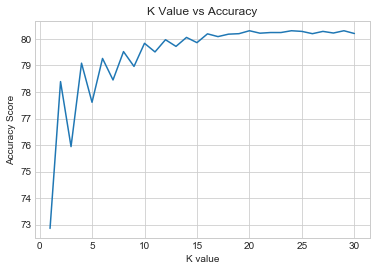

In [66]:
plt.plot(k,scores)
plt.xlabel('K value')
plt.ylabel('Accuracy Score')
plt.title('K Value vs Accuracy')

#### Note
It is evident that from the plot that k value after 20 yields almost the same performance. Hence k =20 is optimum.

Text(0.5,1,'K Value vs errors')

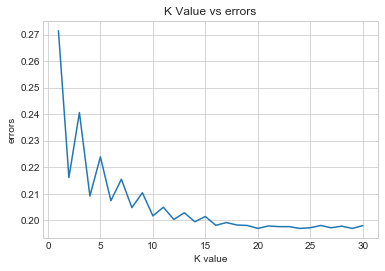

In [67]:
plt.plot(k,errors)
plt.xlabel('K value')
plt.ylabel('errors')
plt.title('K Value vs errors')

#### Note
The errors gradually decreases with increase in K values and does not reduce further after K =20 .It becomes constant.
Hence optimum K value = 20

In [68]:
knn = KNeighborsClassifier(n_neighbors = 20, weights='uniform', algorithm='auto')
knn.fit(X,Y)
Ypred = knn.predict(Xtest)
Ypred_proba = knn.predict_proba(Xtest)
# generate evaluation metrics
print("accuracy of KNN Classifier :",metrics.accuracy_score(Ytest, Ypred))
model_accuracy['Accuracy Score of KNN Classifier neigbors-20'] = metrics.accuracy_score(Ytest, Ypred)

model_accuracy['AUC of KNN Classifier neighbors-20'] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1])

accuracy of KNN Classifier : 0.8030833486886555


# Evaluation of K Nearest Neighbor for K = 20

#### Confusion Matrix

In [69]:
metrics.confusion_matrix(Ytest,Ypred)

array([[12277,   158],
       [ 3048,   798]], dtype=int64)

#### ROC and AUC

In [70]:
print("ROC : ",(metrics.roc_curve(Ytest,Ypred_proba[:,1])))
print("AUC : ",(metrics.roc_auc_score(Ytest,Ypred_proba[:,1])))

ROC :  (array([0.00000000e+00, 3.21672698e-04, 4.02090873e-04, 5.62927222e-04,
       6.43345396e-04, 1.20627262e-03, 1.84961801e-03, 3.05589063e-03,
       4.58383595e-03, 7.31805388e-03, 1.27060716e-02, 2.13108162e-02,
       3.66706876e-02, 6.86771210e-02, 1.22557298e-01, 2.11017290e-01,
       3.56011259e-01, 5.30438279e-01, 7.26819461e-01, 8.85404101e-01,
       9.74829111e-01, 1.00000000e+00]), array([0.        , 0.07670307, 0.09958398, 0.11336453, 0.12584503,
       0.13624545, 0.14534581, 0.15236609, 0.16458658, 0.18434737,
       0.2074883 , 0.22724909, 0.25611024, 0.29589184, 0.35179407,
       0.44071763, 0.55694228, 0.68356734, 0.82293292, 0.93837754,
       0.98959958, 1.        ]), array([2.  , 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55,
       0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ]))
AUC :  0.6484265032040767


# 10 Fold Cross Validation applied to K nearest neighbor model

In [71]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator= KNeighborsClassifier(n_neighbors = 20, weights='uniform', algorithm='auto'),     # Model to test
                X= Features,  
                y = Labels,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-KNN Classifier neighbors-20'] = scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy per fold: 
Cross Validation score:  [0.80143296 0.80184237 0.80450358 0.80266121 0.79918117 0.7993448
 0.8042588  0.80032767 0.79725579 0.79909891]
Average accuracy:  0.8009907260662927


#### Note :
 knn does not provide logic to do feature selection. 

# ENSEMBLE MODEL - BAGGING TECHNIQUE

#### Bagging with Logistic Regression 

In [73]:
from sklearn.ensemble import BaggingClassifier
bag_LR = BaggingClassifier(LogisticRegression(),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3) 

bag_LR.fit(X,Y)

#### Predictions by the Bagging Ensemble model

bag_preds = bag_LR.predict(Xtest)
print("Predictions : ",bag_preds)

bag_preds_proba = bag_LR.predict_proba(Xtest)
print("Prediction Probabilities : ",bag_preds_proba)

#### Score of the bagging ensemble model

bag_LR.score(Xtest,Ytest)

print("Accuracy Score of Bagging for single Logistic Regression Model :",metrics.accuracy_score(Ytest,bag_preds))

#### Confusion Matrix

metrics.confusion_matrix(Ytest,bag_preds)

#### ROC

model_accuracy['Accuracy Score-Bagging-Logistic Regression'] = metrics.accuracy_score(Ytest,bag_preds)
model_accuracy['AUC-Bagging-Logistic Regression'] = metrics.roc_auc_score(Ytest,bag_preds_proba[:,1])

Predictions :  [0 0 0 ... 0 1 0]
Prediction Probabilities :  [[0.84478567 0.15521433]
 [0.74836632 0.25163368]
 [0.8609992  0.1390008 ]
 ...
 [0.84653839 0.15346161]
 [0.32066107 0.67933893]
 [0.76142281 0.23857719]]
Accuracy Score of Bagging for single Logistic Regression Model : 0.7931330999324366


#### Bagging with KNN Model

In [75]:
from sklearn.ensemble import BaggingClassifier
bag_KNN = BaggingClassifier(KNeighborsClassifier(n_neighbors = 20, weights='uniform', algorithm='auto'),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3) 

bag_KNN.fit(X,Y)

#### Predictions by the Bagging Ensemble model

bag_preds = bag_KNN.predict(Xtest)
print("Predictions : ",bag_preds)

bag_preds_proba = bag_KNN.predict_proba(Xtest)
print("Prediction Probabilities : ",bag_preds_proba)

#### Score of the bagging ensemble model

bag_KNN.score(Xtest,Ytest)

print("Accuracy Score of Bagging for single KNN Model :",metrics.accuracy_score(Ytest,bag_preds))

#### Confusion Matrix
metrics.confusion_matrix(Ytest,bag_preds)

#### ROC


model_accuracy['Accuracy Score-Bagging-KNN neighbors -20'] = metrics.accuracy_score(Ytest,bag_preds)
model_accuracy['AUC-Bagging-KNN neighbors -20'] = metrics.roc_auc_score(Ytest,bag_preds_proba[:,1])

Predictions :  [0 0 0 ... 0 0 0]
Prediction Probabilities :  [[0.675 0.325]
 [0.73  0.27 ]
 [0.855 0.145]
 ...
 [0.815 0.185]
 [0.535 0.465]
 [0.865 0.135]]
Accuracy Score of Bagging for single KNN Model : 0.7989067010625883


#### RANDOM FOREST CLASSIFIER model

In [76]:
from sklearn.ensemble import  RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X,Y)
Ypred = RF.predict(Xtest)
Ypred_proba = RF.predict_proba(Xtest)
print("accuracy of Random Forest Classifier :",metrics.accuracy_score(Ytest, Ypred))
model_accuracy['Accuracy score of Random Forest Classifier'] = metrics.accuracy_score(Ytest, Ypred)

accuracy of Random Forest Classifier : 0.8517290092746146


#### Evaluate the Random Forest Model

#### Confusion Matrix

In [77]:
metrics.confusion_matrix(Ytest,Ypred)

array([[11668,   767],
       [ 1647,  2199]], dtype=int64)

#### AUC

In [78]:
print("AUC for Random Forest Classifier : ",metrics.roc_auc_score(Ytest,Ypred_proba[:,1]))
model_accuracy['AUC for Random Forest Classifier'] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1])

AUC for Random Forest Classifier :  0.8817353096214722


#### Feature Selection using feature_importances_ parameter of Random Forest Model

In [79]:
RF.fit(Xtest, Ytest)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), Features.columns),reverse=True))

Features sorted by their score:
[(0.1645, 'fnlwgt'), (0.1507, 'age'), (0.1216, 'capital_gain'), (0.0964, 'relationship'), (0.0873, 'hours_per_week'), (0.0779, 'education_num'), (0.0708, 'marital_status'), (0.0699, 'occupation'), (0.041, 'workclass'), (0.0366, 'capital_loss'), (0.0361, 'education'), (0.0175, 'native_country'), (0.0158, 'sex'), (0.0139, 'race')]


#### Feature Selection using RFECV - Recursive Feature Elimination Using Cross Validation

In [80]:
selector =  RFECV(estimator=RandomForestClassifier(), step=1,cv=10)
selector.fit(Features,Labels)
ranks = selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':Features.columns,'Rank':ranks})
df_rank_cv

,Feature,Rank
0,age,1
1,workclass,1
2,fnlwgt,1
3,education,1
4,education_num,1
5,marital_status,1
6,occupation,1
7,relationship,1
8,race,1
9,sex,1


In [81]:
impcvRF= df_rank_cv.Feature[df_rank_cv.Rank == 1]
print("The important Features in the sample data after REFCV are as follows :-\n",impcvRF.values)

The important Features in the sample data after REFCV are as follows :-
 ['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']


#### 10 Fold Cross Validation for Random Forest Classifier

In [82]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator= RandomForestClassifier(),     # Model to test
                X= Features,  
                y = Labels,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-Random Forest Classifier'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.84585466 0.84953941 0.84380757 0.85363357 0.85158649 0.85626536
 0.84930385 0.85029695 0.84558673 0.85377841]
Average accuracy:  0.8499652997623649


# Using Boosting Method of Ensemble model to predict the annual income

In [83]:
from xgboost.sklearn import XGBClassifier
#set the parameters for the xgbosst model
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}
params['eval_metric'] = ['logloss', 'auc']

# Train the XGBClassifier model 

In [84]:
bst = XGBClassifier(**params).fit(X,Y)

# Predict the annual income

In [85]:
preds = bst.predict(Xtest)
preds

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [86]:
preds_proba = bst.predict_proba(Xtest)
preds_proba

array([[0.9901402 , 0.00985978],
       [0.6302984 , 0.36970162],
       [0.84882355, 0.15117645],
       ...,
       [0.16177893, 0.8382211 ],
       [0.66023326, 0.3397667 ],
       [0.16177893, 0.8382211 ]], dtype=float32)

# Measure the accuracy of the model

In [87]:
correct = 0
from sklearn.metrics import accuracy_score
for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct += 1
        
acc = accuracy_score(Ytest, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Accuracy Score :{:.4f}'.format(acc))
print('Error: {0:.4f}'.format(1-acc))
model_accuracy['Accuracy Score of XGBOOST Model'] = acc

Predicted correctly: 13838/16281
Accuracy Score :0.8499
Error: 0.1501


In [88]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,preds))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     12435
          1       0.72      0.60      0.65      3846

avg / total       0.84      0.85      0.84     16281



#### Confusion Matrix 

In [89]:
metrics.confusion_matrix(Ytest, preds)

array([[11544,   891],
       [ 1552,  2294]], dtype=int64)

#### AUC

In [90]:
print('AUC for XGBOOST model : ',metrics.roc_auc_score(Ytest,preds_proba[:,1]))
model_accuracy['AUC for XGBOOST model'] = metrics.roc_auc_score(Ytest,preds_proba[:,1])

AUC for XGBOOST model :  0.8946264308151739


In [91]:
features = []
scores = []
for k,v in model_accuracy.items():
    features.append(k)
    scores.append(v)


In [92]:
df_scores = pd.DataFrame({'Features':features,'Scores':scores})
feat_cols = ['Features','Scores']
df_scores = df_scores[feat_cols]
df_scores

,Features,Scores
0,Logistic Regression,0.795037
1,AUC_Logistic_Regression,0.701520
2,10 CV Score-Logistic Regression,0.793866
3,Accuracy Score of Decision Tree Classifier Model,0.855107
4,AUC of Decision Tree Model Classifier - depth 10,0.892387
5,"10 CV Score-Decision Tree Classifier, max dept...",0.854510
6,Accuracy Score of KNN Classifier neigbors-20,0.803083
7,AUC of KNN Classifier neighbors-20,0.648427
8,10 CV Score-KNN Classifier neighbors-20,0.800991
9,Accuracy Score-Bagging-Logistic Regression,0.793133


# Answer to Problem 2

The important features are
\n
\n


 ['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']

# Answer to Problem 3


From the above Model Estimation Score dataframe if we take into consideration the AUC value then it is evident that the Decision Tree Classifier Model and XGBOOST ensemble model have the highest accuracy for the model performance.
